In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os

In [3]:
face_dir = '/content/drive/MyDrive/facedata/dataset'

In [4]:
imagePaths = list(paths.list_images(face_dir))
data = []
labels = []

In [6]:
imagePaths[:5]

['/content/drive/MyDrive/facedata/dataset/0/151.jpg',
 '/content/drive/MyDrive/facedata/dataset/0/439.jpg',
 '/content/drive/MyDrive/facedata/dataset/0/375.jpg',
 '/content/drive/MyDrive/facedata/dataset/0/220.jpg',
 '/content/drive/MyDrive/facedata/dataset/0/184.jpg']

In [7]:
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]

	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	data.append(image)
	labels.append(label)

In [8]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [9]:
labels = to_categorical(labels)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, labels,	test_size=0.20, stratify=labels, random_state=42)

In [12]:
EPOCHS = 10
BS = 32

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

mobilenet = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

x = mobilenet.output
x = MaxPooling2D(pool_size=(7,7))(x)
x = Flatten(name="flatten")(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(2, activation="softmax")(x)

model = Model(inputs=mobilenet.input, outputs=x)

for layer in mobilenet.layers:
	layer.trainable = False

model.compile(loss="binary_crossentropy", optimizer=Adam(lr=1e-4), metrics=["accuracy"])

H = model.fit(
	aug.flow(X_train, y_train, batch_size=BS),
	steps_per_epoch=len(X_train) / BS,
	validation_data=(X_test, y_test),
	validation_steps=len(X_test) / BS,
	epochs=EPOCHS)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
34/34 [==============================] - 52s 1s/step - loss: 1.6742 - accuracy: 0.6073 - val_loss: 0.2423 - val_accuracy: 0.9384
Epoch 2/10
34/34 [==============================] - 48s 1s/step - loss: 0.3968 - accuracy: 0.8900 - val_loss: 0.0998 - val_accuracy: 0.9746
Epoch 3/10
34/34 [==============================] - 47s 1s/step - loss: 0.1946 - accuracy: 0.9500 - val_loss: 0.0745 - val_accuracy: 0.9783
Epoch 4/10
34/34 [==============================] - 48s 1s/step - loss: 0.1279 - accuracy: 0.9673 - val_loss: 0.0646 - val_accuracy: 0.9783
Epoch 5/10
34/34 [==============================] - 48s 1s/step - loss: 0.1113 - accuracy: 0.9718 - val_loss: 0.0504 - val_accuracy: 0.9819
Epoch 6/10
34/34 [==============================] - 48s 1s/step - loss: 0.1029 - accuracy: 0.9745 - val_loss: 0.0442 - val_accuracy: 0.9855
Epoch 7/10
34/34 [==============================] - 48s 1s/step - loss: 0.0800 - accuracy: 0.9755 - val_loss: 0.0374 - val_accuracy: 0.9891
Epoch 8/10
34/34 [==

In [17]:
y_pred = model.predict(X_test)

print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       138
           1       1.00      0.99      0.99       138

    accuracy                           0.99       276
   macro avg       0.99      0.99      0.99       276
weighted avg       0.99      0.99      0.99       276



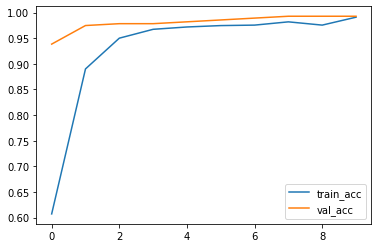

In [31]:
plt.plot(np.arange(0, 10), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label="val_acc")
plt.legend()

In [23]:
mask_test_data = []
mask_test_labels = []
test_num = ['1','2','3','4']
for i in test_num:
	label = 1

	image = load_img('/content/mask_test' + i + '.jpg', target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)

	mask_test_data.append(image)
	mask_test_labels.append(label)

In [24]:
mask_test_data = np.array(mask_test_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


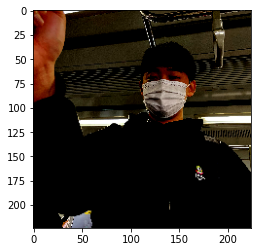

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


마스크 미착용


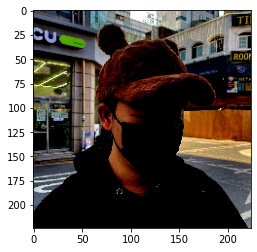

마스크 착용


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


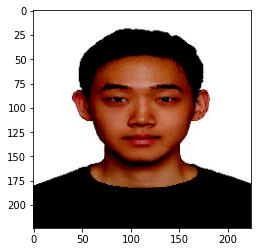

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


마스크 미착용


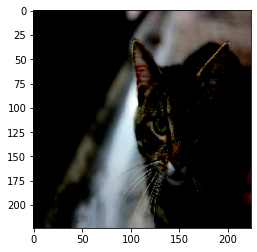

마스크 미착용


In [25]:
test_pred = model.predict(mask_test_data)
for i in range(4):
  test_image = mask_test_data[i]
  plt.imshow(test_image)
  plt.show()
  print("마스크 착용") if(np.argmax(test_pred[i])) else print("마스크 미착용")
  np.argmax(test_pred[i])